# Proyek Sistem Rekomendasi: Movies & Ratings for Recommendation System
- **Nama:** Fatmah Fianka Syafrudin
- **Email:** fatmahfiank17@gmail.com
- **ID Dicoding:** fianka
- **Dataset:** [Movies & Ratings for Recommendation System](https://www.kaggle.com/datasets/nicoletacilibiu/movies-and-ratings-for-recommendation-system)

# Problem Statements
- Pengguna kesulitan menemukan film yang sesuai dengan preferensi pribadi mereka karena terlalu banyak pilihan film yang tersedia di platform digital. Hal ini menyebabkan pengalaman pengguna menjadi kurang optimal dan dapat mengurangi minat menonton.

- Sistem rekomendasi konvensional sering kali belum memanfaatkan data historis pengguna secara optimal, sehingga belum mampu menyajikan rekomendasi yang benar-benar relevan dan personal.

- Kurangnya sistem rekomendasi yang secara efektif menggabungkan pendekatan berbasis konten (seperti genre film) dan kolaboratif (berdasarkan kesamaan preferensi antar pengguna), sehingga potensi data pengguna belum dimanfaatkan sepenuhnya untuk meningkatkan akurasi rekomendasi.

# Goals
- Meningkatkan pengalaman pengguna dalam memilih film dengan menghadirkan rekomendasi yang relevan berdasarkan preferensi pribadi pengguna, tanpa harus menelusuri ribuan pilihan secara manual.

- Membangun sistem rekomendasi film dengan dua pendekatan utama Content-Based Filtering dan Collaborative Filtering yang memanfaatkan data historis pengguna seperti rating dan genre film.

- Mengembangkan model yang mampu mengidentifikasi kemiripan antar film maupun pola preferensi antar pengguna, guna menyarankan film yang sesuai dengan minat pengguna.

# Data Understanding

In [ ]:
from google.colab import files
files.upload()

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nicoletacilibiu/movies-and-ratings-for-recommendation-system
!unzip movies-and-ratings-for-recommendation-system.zip

Dataset URL: https://www.kaggle.com/datasets/nicoletacilibiu/movies-and-ratings-for-recommendation-system
License(s): CC0-1.0
  0% 0.00/846k [00:00<?, ?B/s]
100% 846k/846k [00:00<00:00, 552MB/s]
Archive:  movies-and-ratings-for-recommendation-system.zip
  inflating: movies.csv              
  inflating: ratings.csv             


In [5]:
import pandas as pd

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

print('Jumlah film: ', len(movies.movieId.unique()))
print('Jumlah pengguna yang memberikan rating: ', len(ratings.userId.unique()))

Jumlah film:  9742
Jumlah pengguna yang memberikan rating:  610


# Univariate Exploratory Data Analysis

Pada proyek kali ini terdapat 2 dataset yaitu movies dan ratings.
Variabel-variabel pada kedua dataset adalah sebagai berikut:
- movies : berisi informasi film.
  - movieId: ID unik untuk setiap film
  - title: Judul film, biasanya mencakup nama film diikuti tahun rilis dalam tanda kurung.
  - genres: daftar genre film, bisa berisi satu atau beberapa genre yang relevan dengan film tersebut, jika terdapat lebih dari satu genre, mereka dipisahkan dengan tanda `|`.

- ratings : berisi data rating yang diberikan pengguna.
  - userId: ID unik untuk setiap pengguna yang memberikan rating.
  - movieId: ID film yang diberikan rating oleh pengguna.
  - rating: Nilai rating yang diberikan pengguna untuk film tersebut. Biasanya berupa skala penilaian 0.5 – 5.0 di mana nilai semakin tinggi angka berarti pengguna lebih menyukai film tersebut.
  - timestamp: timestamp yang menunjukkan kapan rating diberikan.

## Movies Variabel




In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Dataset berisi 9742 baris dan 4 kolom.

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


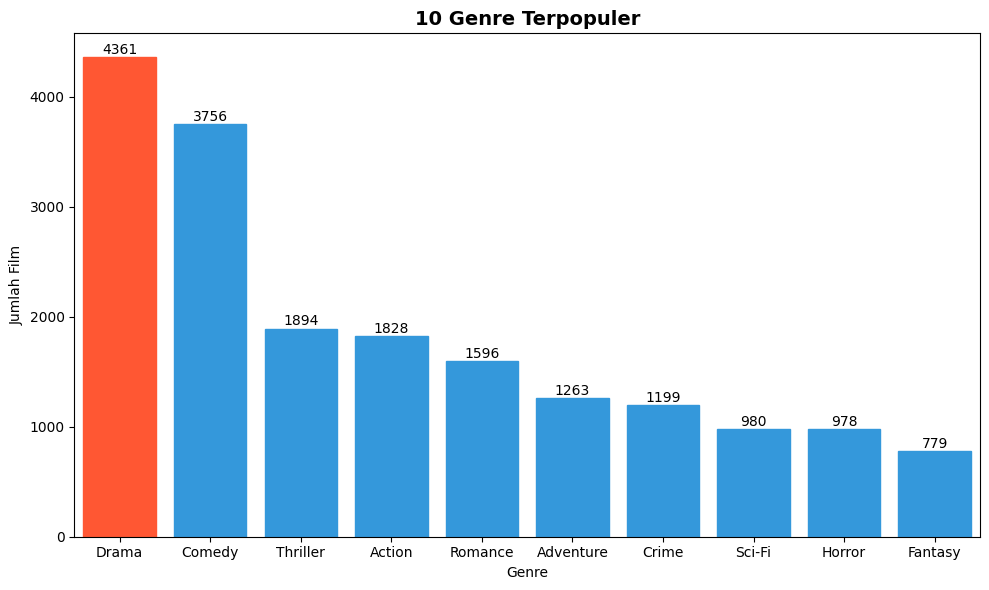

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

genre_list = [g for sublist in movies['genres'].str.split('|').tolist() for g in sublist]
top_genres = pd.Series(Counter(genre_list)).sort_values(ascending=False).head(10)

colors = ['#FF5733'] + ['#3498DB'] * (len(top_genres) - 1)

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_genres.index, y=top_genres.values, color='#3498DB')

for bar, color in zip(bars.patches, colors):
    bar.set_color(color)

for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f'{int(bar.get_height())}',
        ha='center',
        va='bottom',
        fontsize=10,
    )

plt.title("10 Genre Terpopuler", fontsize=14, fontweight='bold')
plt.ylabel("Jumlah Film")
plt.xlabel("Genre")

plt.tight_layout()
plt.show()


Dapat dilihat pada grafik Top 10 Genre Terpopuler  menunjukkan bahwa genre terbanyak adalah Drama dengan total 4361 film, diikuti dengan Comedy, Thriller, Action, Romance, Adventure, Crime, Sci-Fi, Horror dan yang terakhir Fantasy.

## Ratings Variable

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Terdapat 100836 baris dan 4 kolom.

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


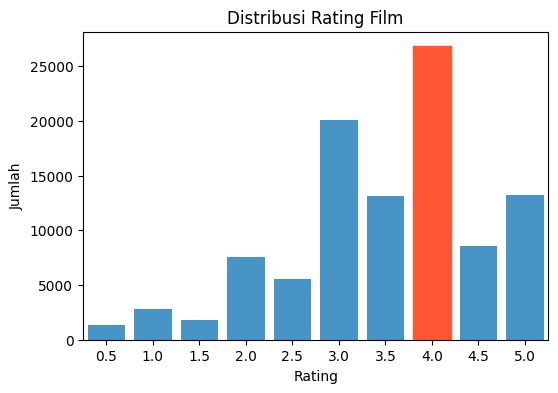

In [14]:
plt.figure(figsize=(6, 4))
bars = sns.countplot(x='rating', data=ratings, color='#3498DB')

heights = [bar.get_height() for bar in bars.patches]
max_height = max(heights)
max_index = heights.index(max_height)

bars.patches[max_index].set_color('#FF5733')

plt.title("Distribusi Rating Film")
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

Dapat dilihat bahwa rating 4.0 adalah yang paling sering diberikan untuk film yang ditonton. Sementara rating rendah seperti 0.5, 1.0, dan 1.5 cenderung jarang diberikan oleh pengguna.

# Data Preparation

In [ ]:
print('Duplikasi data pada movies:', movies.duplicated().sum())
print('Duplikasi data pada ratings:', ratings.duplicated().sum())

Duplikat pada movies: 0
Duplikat pada ratings: 0


In [15]:
print("Missing values pada movies:")
print(movies.isnull().sum())

Missing values pada movies:
movieId    0
title      0
genres     0
dtype: int64


In [16]:
print("Missing values pada ratings:")
print(ratings.isnull().sum())

Missing values pada ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


Melakukan pengecekan duplikasi data dan
nilai null, dapat dilihat bahwa tidak terdapat duplikasi data dan nilai null sehingga tidak perlu dilakukan penanganan seperti penghapusan data yang terdapat duplikat atau nilai null.

# Model Development Content Based Filtering

## TF-IDF Vectorizer

In [19]:
movies['genres'] = movies['genres'].str.replace('|',' ',regex=False)

Melakukan transformasi pada kolom genres di movies_df untuk keperluan model Content-Based Filtering. Pada dataset movies, setiap film memiliki daftar genre yang dituliskan dalam satu kolom sebagai string, di mana masing-masing genre dipisahkan oleh simbol pipe (|). Sebelum melakukan pemodelan Content Based, delimiter | ini diubah menjadi spasi. Contohnya, genre “Action|Adventure|Comedy” akan diubah menjadi “Action Adventure Comedy”. Perubahan ini bertujuan agar setiap genre dapat diperlakukan sebagai kata terpisah ketika teks genre tersebut diproses lebih lanjut.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(movies['genres'])
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

In [21]:
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(9742, 24)

In [22]:
tfidf_matrix.todense()

matrix([[0.        , 0.41684567, 0.51622547, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.51236121, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.57860574, 0.        , 0.81560738, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [24]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=movies.title
).sample(15, axis=1, replace=True).sample(5, axis=0)

,film,animation,romance,drama,thriller,mystery,mystery,fi,listed,noir,noir,horror,noir,drama,noir
title,,,,,,,,,,,,,,,
2012 (2009),0.000000,0.000000,0.000000,0.288529,0.42190,0.0,0.0,0.527226,0.0,0.000000,0.000000,0.0,0.000000,0.288529,0.000000
City Hunter (Sing si lip yan) (1993),0.000000,0.000000,0.646942,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
"Sorry, Wrong Number (1948)",0.657462,0.000000,0.000000,0.207783,0.30383,0.0,0.0,0.000000,0.0,0.657462,0.657462,0.0,0.657462,0.207783,0.657462
"Goofy Movie, A (1995)",0.000000,0.599681,0.447014,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
"Masque of the Red Death, The (1964)",0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000


Pada tahap ini, dilakukan pembentukan fitur konten film dengan menerapkan metode TF-IDF pada data genre. Metode ini menghasilkan representasi numerik dalam bentuk vektor untuk setiap film, yang mencerminkan tingkat kepentingan setiap genre bagi film tersebut dibandingkan dengan film lainnya.

Setiap film diwakili oleh vektor berdimensi 24, di mana setiap nilai menunjukkan relevansi suatu genre terhadap film tersebut. Genre yang memang dimiliki oleh film akan mendapatkan bobot lebih tinggi, khususnya jika genre tersebut jarang muncul di film lain. Film-film dengan genre serupa akan memiliki pola nilai TF-IDF yang cenderung mirip.

## Cosine Similarity

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.81357774, 0.15276924, ..., 0.        , 0.4210373 ,
        0.26758648],
       [0.81357774, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15276924, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57091541],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.4210373 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26758648, 0.        , 0.57091541, ..., 0.        , 0.        ,
        1.        ]])

In [26]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies['title'], columns=movies['title'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9742, 9742)


title,"Guardian, The (2006)","Crazy, Stupid, Love. (2011)","Rewrite, The (2014)",Little Ashes (2008),"Pallbearer, The (1996)"
title,,,,,
Elling (2001),0.276037,0.687440,0.419413,0.678466,0.734632
"Oh, God! You Devil (1984)",0.000000,0.505015,0.570915,0.000000,1.000000
Heavy Metal (1981),0.465353,0.000000,0.000000,0.000000,0.000000
"Vanishing, The (Spoorloos) (1988)",0.229669,0.263285,0.000000,0.564498,0.000000
National Security (2003),0.486812,0.297942,0.336821,0.000000,0.589966
Quatermass and the Pit (1967),0.000000,0.000000,0.000000,0.000000,0.000000
"Crew, The (2000)",0.000000,0.505015,0.570915,0.000000,1.000000
Making the Grade (1984),0.000000,0.505015,0.570915,0.000000,1.000000
Blank Check (1994),0.000000,0.236508,0.267370,0.000000,0.468319


Pada tahap ini, dilakukan penghitungan tingkat kemiripan antar film dengan menggunakan vektor TF-IDF dari genre yang telah dibentuk sebelumnya. Metode yang digunakan adalah Cosine Similarity, yaitu metrik yang mengukur kemiripan dua vektor berdasarkan sudut di antara keduanya. Nilai cosine similarity yang mendekati 1 menunjukkan bahwa dua film memiliki genre yang sangat mirip, sedangkan nilai yang mendekati 0 menunjukkan perbedaan genre yang signifikan.


## Mendapatkan Rekomendasi

In [27]:
def movies_recommendations(movies_name, similarity_data=cosine_sim_df, items=movies[['movieId','title', 'genres']], k=10):
    index = similarity_data.loc[:,movies_name].to_numpy().argpartition(
        range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(movies_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [28]:
movies[movies.title.eq('Pacific Rim (2013)')]

,movieId,title,genres
8194,103228,Pacific Rim (2013),Action Adventure Sci-Fi IMAX


In [30]:
movies_recommendations('Pacific Rim (2013)')

,title,movieId,genres
0,Ender's Game (2013),106002,Action Adventure Sci-Fi IMAX
1,"Avengers, The (2012)",89745,Action Adventure Sci-Fi IMAX
2,Superman Returns (2006),46530,Action Adventure Sci-Fi IMAX
3,Star Trek (2009),68358,Action Adventure Sci-Fi IMAX
4,Spider-Man 2 (2004),8636,Action Adventure Sci-Fi IMAX
5,John Carter (2012),93363,Action Adventure Sci-Fi IMAX
6,Tron: Legacy (2010),82461,Action Adventure Sci-Fi IMAX
7,Godzilla (2014),111364,Action Adventure Sci-Fi IMAX
8,Star Trek Into Darkness (2013),102445,Action Adventure Sci-Fi IMAX
9,Star Wars: Episode II - Attack of the Clones (...,5378,Action Adventure Sci-Fi IMAX


Pada tahap ini, dibuat sebuah fungsi rekomendasi yang menerima input berupa judul film, lalu mencari dan menampilkan film lain dengan genre paling serupa menggunakan matriks cosine similarity yang telah dihitung sebelumnya.

## Metrik Evaluasi Content Based Filtering

In [55]:
def precision_at_k(recommended, relevant, k=10):
    recommended_at_k = recommended[:k]
    hits = sum([1 for rec in recommended_at_k if rec in relevant])
    return hits / k

recommended_movies = [106002, 46530, 68358, 8636, 93363, 82461, 111364, 102445, 103228, 5378]

genre_target = movies[movies.title == 'Avengers, The (2012)']['genres'].values[0]
relevant_movies = set(movies[movies.genres == genre_target]['movieId'].values)

print("Precision@10:", precision_at_k(recommended_movies, relevant_movies, k=10))

Precision@10: 1.0


# Model Development dengan Collaborative Filtering

## Data Preparation

In [34]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [35]:
df = ratings
df.drop('timestamp', axis=1, inplace=True)
df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [36]:
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [37]:
movies_ids = df['movieId'].unique().tolist()

movies_to_movies_encoded = {x: i for i, x in enumerate(movies_ids)}

movies_encoded_to_movies = {i: x for i, x in enumerate(movies_ids)}

In [38]:
df['user'] = df['userId'].map(user_to_user_encoded)

df['movie'] = df['movieId'].map(movies_to_movies_encoded)

In [39]:
num_users = len(user_to_user_encoded)
print(num_users)

num_movies = len(movies_encoded_to_movies)
print(num_movies)

df['rating'] = df['rating'].values.astype(np.float32)

min_rating = min(df['rating'])

max_rating = max(df['rating'])

print('Number of User: {}, Number of movies: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movies, min_rating, max_rating
))

610
9724
Number of User: 610, Number of movies: 9724, Min Rating: 0.5, Max Rating: 5.0


Pada tahap ini, data dipersiapkan untuk model Collaborative Filtering dengan mengubah userId dan movieId menjadi indeks integer berurutan mulai dari 0. Proses encoding ini penting karena model machine learning menggunakan indeks tersebut sebagai input untuk embedding, yang biasanya memerlukan nilai indeks integer yang berurutan dari 0 hingga N-1.

## Membagi Data untuk Training dan Validasi

In [40]:
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,user,movie
67037,432,77866,4.5,431,4730
42175,288,474,3.0,287,474
93850,599,4351,3.0,598,2631
6187,42,2987,4.0,41,194
12229,75,1610,4.0,74,727
...,...,...,...,...,...
6265,42,4005,4.0,41,1873
54886,364,141,4.0,363,524
76820,480,6867,4.0,479,2240
860,6,981,3.0,5,712


In [41]:
x = df[['user', 'movie']].values

y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


Pada tahap ini dilakukan proses normalisasi rating serta pembagian data menjadi set pelatihan dan validasi. Normalisasi rating bertujuan untuk membatasi rentang nilai target yang akan diprediksi oleh model. Dalam kasus ini, rating asli yang berada di rentang 0,5 hingga 5,0 diubah menjadi skala 0 hingga 1 menggunakan metode min-max scaling, yaitu dengan rumus: (rating - min\_rating) / (max\_rating - min\_rating). Dengan nilai min\_rating = 0,5 dan max\_rating = 5,0, maka rating 0,5 akan diubah menjadi 0,0 dan rating 5,0 menjadi 1,0.

Setelah proses normalisasi selesai, data kemudian dibagi menjadi dua bagian: 80% untuk data pelatihan dan 20% untuk data validasi. Pembagian ini dilakukan agar model dapat diuji performanya pada data yang belum pernah dilihat selama pelatihan.


## Proses Training

In [43]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movies, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movies = num_movies
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.movies_embedding = layers.Embedding(
        num_movies,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movies_bias = layers.Embedding(num_movies, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    movies_vector = self.movies_embedding(inputs[:, 1])
    movies_bias = self.movies_bias(inputs[:, 1])

    dot_user_movies = tf.tensordot(user_vector, movies_vector, 2)

    x = dot_user_movies + user_bias + movies_bias

    return tf.nn.sigmoid(x)

In [44]:
model = RecommenderNet(num_users, num_movies, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [45]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 512,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.6779 - root_mean_squared_error: 0.2725 - val_loss: 0.6338 - val_root_mean_squared_error: 0.2285
Epoch 2/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.7833 - root_mean_squared_error: 0.3025 - val_loss: 0.7659 - val_root_mean_squared_error: 0.3414
Epoch 3/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.0274 - root_mean_squared_error: 0.4608 - val_loss: 0.6555 - val_root_mean_squared_error: 0.2457
Epoch 4/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.7732 - root_mean_squared_error: 0.2902 - val_loss: 0.6867 - val_root_mean_squared_error: 0.2790
Epoch 5/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6775 - root_mean_squared_error: 0.2707 - val_loss: 0.6313 - val_root_mean_squared_error: 0.2259
Epoch 6/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.6718 - root_mean_squared_error: 0.2544 - val_loss: 0.6728 - val_root_mean_squared_error: 0.2666
Epoch 7/100
158/158 ━━━━━━━━━━━━━━━━━━━━

Tahap ini melibatkan perancangan arsitektur model Collaborative Filtering yang berupa neural network dengan penggunaan embedding layers untuk merepresentasikan pengguna dan film. Inti dari model ini adalah mempelajari vektor embedding untuk setiap pengguna dan film, kemudian menghitung hasil dot product antara vektor pengguna dan film sebagai prediksi tingkat kesukaan (rating). Selain itu, model juga menambahkan bias khusus untuk setiap pengguna dan film sebelum melakukan proses pelatihan.

## Visualisasi Metrik

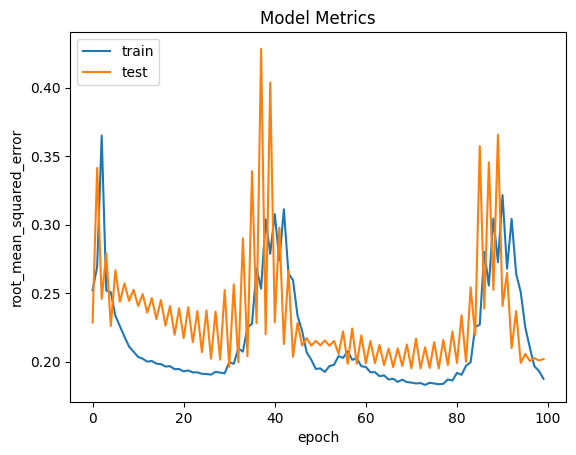

In [47]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Performa model yang diukur menggunakan RMSE menunjukkan hasil yang baik dengan nilai di bawah 1.0 pada data validasi, yang berarti rata-rata kesalahan prediksi kurang dari 1 poin. Nilai RMSE pada data pelatihan yang lebih rendah dibandingkan validasi mengindikasikan model mampu mempelajari data latih dengan baik, namun selisih yang cukup besar antara keduanya menandakan kemungkinan terjadi overfitting.

## Mendapat Rekomendasi Film

In [48]:
movies_df = movies
ratings_df = ratings

user_id = ratings_df.userId.sample(1).iloc[0]
movies_watched_by_user = ratings_df[ratings_df.userId == user_id]

movie_not_watched = movies_df[~movies_df['movieId'].isin(movies_watched_by_user.movieId.values)]['movieId']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movies_to_movies_encoded.keys()))
)

movie_not_watched = [[movies_to_movies_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movies_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [49]:
ratings = model.predict(user_movies_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movies_ids = [
    movies_encoded_to_movies.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movies with high ratings from user')
print('----' * 8)

top_movies_user = (
    movies_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movies_df_rows = movies_df[movies_df['movieId'].isin(top_movies_user)]
for row in movies_df_rows.itertuples():
    print(row.title, ':', row.genres)

print('----' * 8)
print('Top 10 movies recommendation')
print('----' * 8)

recommended_movies = movies_df[movies_df['movieId'].isin(recommended_movies_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ':', row.genres)

297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Showing recommendations for users: 354
movies with high ratings from user
--------------------------------
Usual Suspects, The (1995) : Crime|Mystery|Thriller
From Dusk Till Dawn (1996) : Action|Comedy|Horror|Thriller
Shawshank Redemption, The (1994) : Crime|Drama
Forrest Gump (1994) : Comedy|Drama|Romance|War
Terminator 2: Judgment Day (1991) : Action|Sci-Fi
--------------------------------
Top 10 movies recommendation
--------------------------------
Secrets & Lies (1996) : Drama
Streetcar Named Desire, A (1951) : Drama
Paths of Glory (1957) : Drama|War
Guess Who's Coming to Dinner (1967) : Drama
Trial, The (Procès, Le) (1962) : Drama
Adam's Rib (1949) : Comedy|Romance
Day of the Doctor, The (2013) : Adventure|Drama|Sci-Fi
Captain Fantastic (2016) : Drama
Band of Brothers (2001) : Action|Drama|War
Three Billboards Outside Ebbing, Missouri (2017) : Crime|Drama


Pada tahap ini dilakukan proses pembuatan rekomendasi film untuk pengguna tertentu dengan menggunakan model collaborative filtering yang sudah dilatih. Berbeda dengan metode content-based yang mengandalkan kemiripan antar film, pendekatan ini berdasarkan pada preferensi pengguna dan pola rating dari pengguna lain. Terdapat daftar 10 film rekomendasi untuk pengguna yang dipilih, yang berisi film-film belum pernah ditonton oleh pengguna tersebut, disusun berdasarkan prediksi rating tertinggi hingga terendah. Film nomor satu di daftar merupakan film yang diperkirakan paling disukai oleh pengguna menurut model.

<ipython-input-54-f57f459e66c1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='rating', data=best_movies, palette='coolwarm')


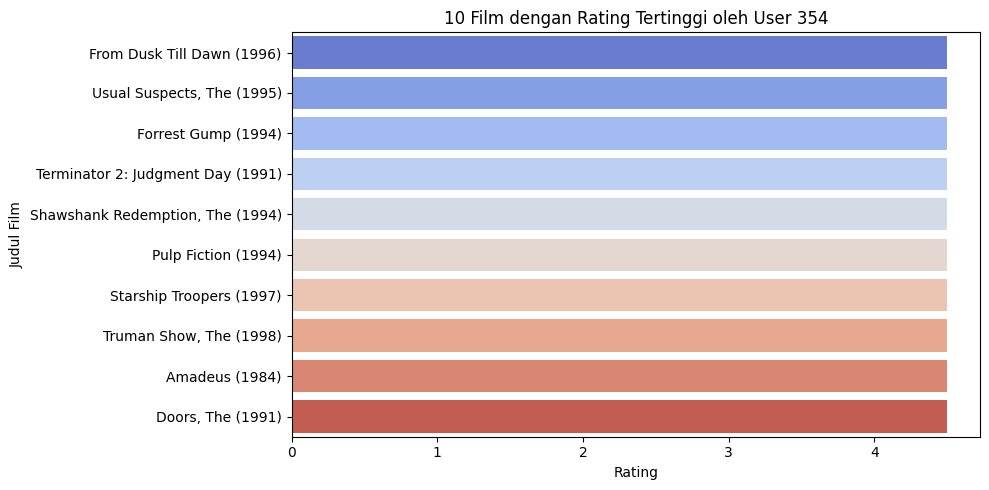

In [54]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

merged = ratings.merge(movies, on='movieId', how='left')
data_user = merged[merged['userId'] == user_id]
best_movies = data_user.sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(y='title', x='rating', data=best_movies, palette='coolwarm')
plt.title(f'10 Film dengan Rating Tertinggi oleh User {user_id}')
plt.xlabel('Rating')
plt.ylabel('Judul Film')
plt.tight_layout()
plt.show()

Pada tahap ini, dilakukan visualisasi film-film dengan rating tertinggi dari seorang pengguna tertentu. Visualisasi tersebut memudahkan pemahaman terhadap preferensi pengguna berdasarkan riwayat rating yang diberikan. Grafik menampilkan 10 film dengan rating tertinggi yang telah diberikan oleh pengguna yang sebelumnya direkomendasikan.